# Caso Práctico: Clasificación de imágenes

## 1. Conjunto de datos

In [1]:
from tensorflow.keras import datasets

2023-10-31 11:37:41.889850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fashion_mnist = datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## 2. Visualización del conjunto de datos

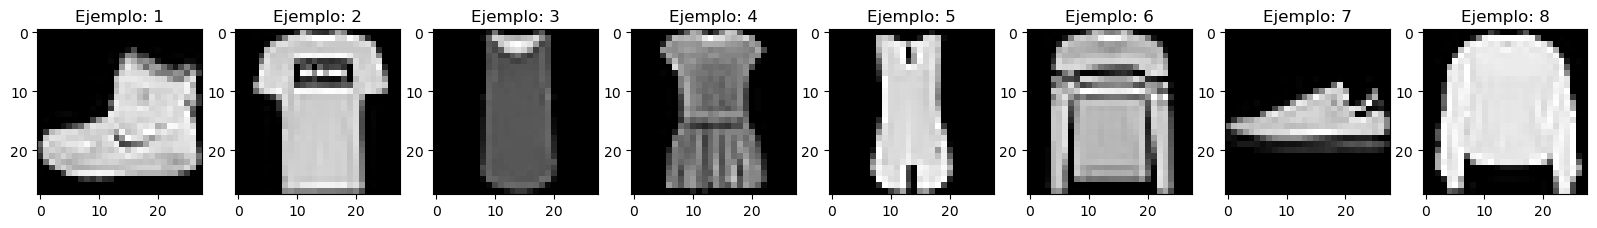

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, img in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [5]:
print("Longitud subconjunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de pruebas: ", len(X_test))

Longitud subconjunto de entrenamiento:  60000
Longitud subconjunto de pruebas:  10000


## 3. Transformación del conjunto de datos

In [6]:
X_train_prep = X_train.reshape((60000, 28*28))
X_test_prep = X_test.reshape((10000, 28*28))

In [7]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
X_train_prep = transformer.fit_transform(X_train_prep)
X_test_prep = transformer.transform(X_test_prep)

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

## 4. Construcción del modelo

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'Precision'])

In [11]:
history = network.fit(X_train_prep, 
                      y_train_prep,
                      batch_size=32,
                      epochs=15, 
                      validation_data=(X_test_prep, y_test_prep))

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5124 - accuracy: 0.8145 - precision: 0.8680 - val_loss: 0.4194 - val_accuracy: 0.8498 - val_precision: 0.8799
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3668 - accuracy: 0.8659 - precision: 0.8924 - val_loss: 0.3968 - val_accuracy: 0.8541 - val_precision: 0.8778
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3302 - accuracy: 0.8778 - precision: 0.8999 - val_loss: 0.3608 - val_accuracy: 0.8677 - val_precision: 0.8948
Epoch 4/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3053 - accuracy: 0.8861 - precision: 0.9063 - val_loss: 0.3539 - val_accuracy: 0.8698 - val_precision: 0.8912
Epoch 5/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2855 - accuracy: 0.8936 - precision: 0.9125 - val_loss: 0.3451 - val_accuracy: 0.8753 - val_precision: 0.8928
Epoch 6/15
1875/1875 [==============================] - 